In [45]:
"""
 logscale : 
           
 create   : 2019/10/17
 modified : 2019/10/19
"""

'\n logscale : \n           \n create   : 2019/10/17\n modified : 2019/10/19\n'

In [46]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import time
import numpy as np

In [47]:
def rgb2gray(rgb):
    return np.dot(rgb[..., :3], [0.2989, 0.5870, 0.1140])

In [48]:
# convolution 2D
def conv2d(img, kernel, padding='same'):
    # Error handling
    if kernel.shape[0] != kernel.shape[1]:
        print("Use square filter!")
        return None
    
    if kernel.shape[0]%2 == 0 and kernel.shape[1]%2 == 0:
        print("filter size has to be odd")
        return None
    
    # Create result matrix
    result = np.zeros_like(img)
    
    # Calculate kernel size
    kernel_size = kernel.shape[0]
    
    # same padding
    if padding=='same':
        pad_size = int((kernel_size - 1) / 2)
    else:
        pad_size = 0
    img = np.pad(img, pad_size, mode='constant')
    
    # convolution
    width, height = img.shape
    offset = int(kernel_size / 2)
    for x in range(offset, width-offset):
        for y in range(offset, height-offset):
            result[x-offset, y-offset] = np.sum(img[x-offset:x+offset+1, y-offset:y+offset+1] * kernel)
            
    return result

In [49]:
def LoG(sigma=1, stencil=19):
    """
        Parameters:
            1. sigma : the width of the Gaussian kernel
            2. stencil : the overall image size of the filter (default 19x19)
            
        Return:
            1. a numpy array with the filter values
    """
    #Log_filter = np.zeros((stencil,stencil))
    #for x in range(stencil):
    #    for y in range(stencil):
    #        tmp = ((x - (stencil-1)/2)**2 + (y - stencil-1)/2)**2)/(2*(sigma**2))
    #        Log_filter[x, y] = (-1/(np.pi*(sigma**4)))*(1-tmp)*np.exp(-tmp)
    
    # Using matrix operation (faster)
    basis = (np.arange(stencil)) - stencil//2
    x, y = np.meshgrid(basis, basis)
    
    tmp = (x**2 + y**2) / (2*(sigma**2))
    Log_filter = -(1/(np.pi*(sigma**4))) * (1 - tmp) * np.exp(-tmp)
    return Log_filter

In [50]:
def filterImg(img, fil):
    """
        Paramters:
            1. img : input image
            2. fil : filter
            
        Return:
            1. the filtered image
    """
    return conv2d(img.copy(), fil, padding="same")

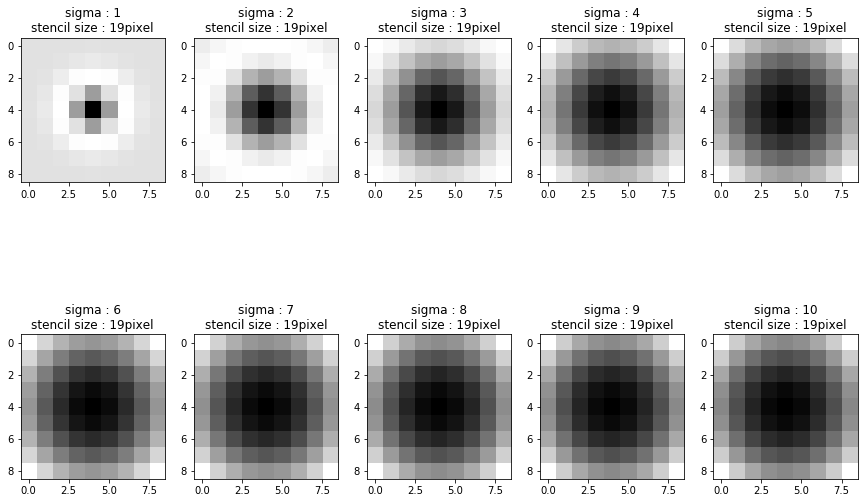

In [51]:
# Log filters
sigmas = [sigma+1 for sigma in range(10)]
fig = plt.figure(figsize= (15,10))
for sigma in sigmas:
    LoG_filter = LoG(sigma=sigma, stencil=9)
    ax = fig.add_subplot(2, 5, sigma)
    ax.imshow(LoG_filter, cmap='gray')
    ax.set_title("sigma : %d\nstencil size : %dpixel" %(sigma, 19))

(506, 900)

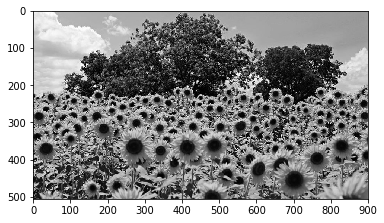

In [52]:
# read image
img = mpl.image.imread("sunflower.jpg")
img = rgb2gray(img)
plt.imshow(img, cmap='gray')
img.shape

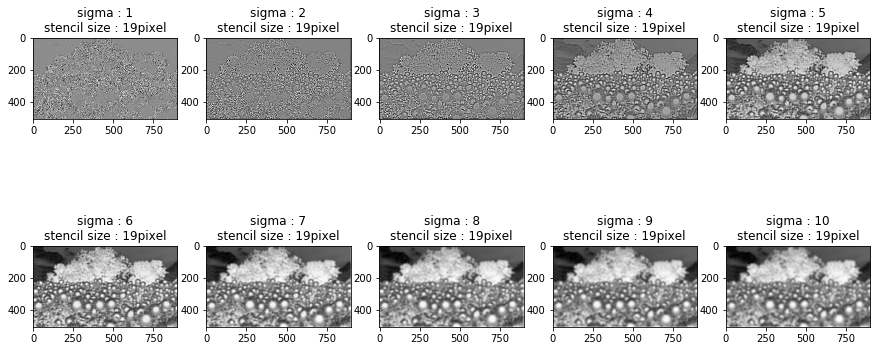

In [53]:
# Log filters
sigmas = [sigma+1 for sigma in range(10)]
fig = plt.figure(figsize= (15,7))
for sigma in sigmas:
    LoG_filter = LoG(sigma=sigma)
    result = filterImg(img, LoG_filter)
    ax = fig.add_subplot(2, 5, sigma)
    ax.imshow(result, cmap='gray')
    ax.set_title("sigma : %d\nstencil size : %dpixel" %(sigma, 19))

In [79]:
def trackScale(img, sigmas, stencil, threshold):
    # 1. Create LoG filters
    LoG_filters = [LoG(sigma=sigma, stencil=stencil) for sigma in sigmas]
    
    # 2. Filters img with each LoG filter
    filtered_img = []
    for LoG_filter in LoG_filters:
        filtered_img.append(filterImg(img, LoG_filter))
        
    # 3. For each pixel in the stack of filtered images, finds the maximum value
    totScale = np.max(np.array(filtered_img), axis=0)
    scale_idx = np.argmax(np.array(filtered_img), axis=0)
    
    
    # Plots the inpu picture img with overlays of the scaled blobs
    #fig = plt.figure(figsize= (15,7))
    fig, ax = plt.subplots()
    ax.imshow(img, cmap='gray')
    
    width, height = img.shape
    for x in range(width):
        for y in range(height):
            if totScale[x][y] > threshold:
                circle = mpl.patches.Circle((x, y), scale_idx[x][y]+10, color='blue', fill=False)
                ax.add_patch(circle)
                
    plt.show()

In [ ]:
# read image
img = mpl.image.imread("sunflower.jpg")
img = rgb2gray(img) * 255
sigmas = [sigma+1 for sigma in range(10)]
stencil = 19
threshold = 80

trackScale(img, sigmas, stencil, threshold)